<a href="https://colab.research.google.com/github/Lipwig/dw_matrix_road_sign/blob/master/matrix3_day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [4]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [8]:
model = Sequential([
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),

  Flatten(),

  Dense(num_classes, activation='softmax'),
])

#model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 3s 3ms/step - loss: 13.9718 - accuracy: 0.8077


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),

    Flatten(),

    Dense(num_classes, activation='softmax'),
  ])

def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  model.fit(X_train, y_train)

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train,
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (X_train, y_train)),
      callbacks=[tensorboard_callback]
  )

  return model

In [12]:
model = get_cnn_v1(input_shape, num_classes)
trained_model = train_model(model, X_train, y_train)

1088/1088 [==============================] - 3s 3ms/step - loss: 9.1017 - accuracy: 0.7994
Epoch 1/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1657 - accuracy: 0.9612 - val_loss: 0.0839 - val_accuracy: 0.9807
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0773 - accuracy: 0.9821 - val_loss: 0.0492 - val_accuracy: 0.9893
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0501 - accuracy: 0.9881 - val_loss: 0.0326 - val_accuracy: 0.9932
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0371 - accuracy: 0.9912 - val_loss: 0.0267 - val_accuracy: 0.9940
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0331 - accuracy: 0.9927 - val_loss: 0.0380 - val_accuracy: 0.9921


In [0]:
signs = pd.read_csv('data/signnames.csv')
signs_dict = signs.to_dict()['b']

In [0]:
def predict(trained_model, X_test, y_test, scoring=accuracy_score):

  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = trained_model.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

<BarContainer object of 43 artists>

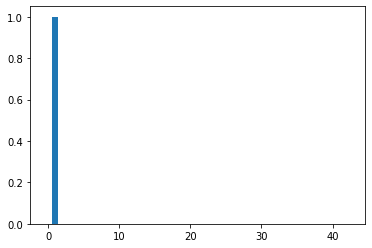

In [25]:
# plt.bar(range(43), y_pred_prob[400])

In [23]:
# signs_dict[ np.argmax(y_pred_prob[400]) ]

'Speed limit (30km/h)'

In [29]:
predict(trained_model, X_test, y_test)

0.85578231292517

In [0]:
def train_and_predict(model):
  trained_model = train_model(model, X_train, y_train)
  return predict(trained_model, X_test, y_test)

In [34]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])

train_and_predict( get_cnn_v2(input_shape, num_classes) )

1088/1088 [==============================] - 4s 3ms/step - loss: 3.3433 - accuracy: 0.3995
Epoch 1/5
272/272 [==============================] - 3s 10ms/step - loss: 0.5684 - accuracy: 0.8285 - val_loss: 0.1982 - val_accuracy: 0.9601
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.3630 - accuracy: 0.8890 - val_loss: 0.1225 - val_accuracy: 0.9776
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2748 - accuracy: 0.9170 - val_loss: 0.0697 - val_accuracy: 0.9849
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2270 - accuracy: 0.9321 - val_loss: 0.0521 - val_accuracy: 0.9912
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1944 - accuracy: 0.9426 - val_loss: 0.0431 - val_accuracy: 0.9922


0.9331065759637188

In [35]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])

train_and_predict( get_cnn_v3(input_shape, num_classes) )

1088/1088 [==============================] - 4s 4ms/step - loss: 1.3393 - accuracy: 0.6643
Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2683 - accuracy: 0.9176 - val_loss: 0.0730 - val_accuracy: 0.9826
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1702 - accuracy: 0.9479 - val_loss: 0.0360 - val_accuracy: 0.9911
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1370 - accuracy: 0.9570 - val_loss: 0.0250 - val_accuracy: 0.9932
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1140 - accuracy: 0.9656 - val_loss: 0.0184 - val_accuracy: 0.9957
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.0965 - accuracy: 0.9706 - val_loss: 0.0104 - val_accuracy: 0.9980


0.9643990929705215

In [40]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])

# get_cnn_v4(input_shape, num_classes).summary()
train_and_predict( get_cnn_v4(input_shape, num_classes) )

1088/1088 [==============================] - 5s 5ms/step - loss: 1.8822 - accuracy: 0.4680
Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 0.6053 - accuracy: 0.8053 - val_loss: 0.2130 - val_accuracy: 0.9440
Epoch 2/5
272/272 [==============================] - 3s 13ms/step - loss: 0.4144 - accuracy: 0.8661 - val_loss: 0.1657 - val_accuracy: 0.9497
Epoch 3/5
272/272 [==============================] - 3s 13ms/step - loss: 0.3104 - accuracy: 0.9019 - val_loss: 0.1127 - val_accuracy: 0.9627
Epoch 4/5
272/272 [==============================] - 3s 13ms/step - loss: 0.2548 - accuracy: 0.9203 - val_loss: 0.0708 - val_accuracy: 0.9788
Epoch 5/5
272/272 [==============================] - 3s 13ms/step - loss: 0.2110 - accuracy: 0.9349 - val_loss: 0.0618 - val_accuracy: 0.9815


0.9603174603174603

In [60]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])

# get_cnn_v4(input_shape, num_classes).summary()
train_and_predict( get_cnn_v5(input_shape, num_classes) )

1088/1088 [==============================] - 5s 5ms/step - loss: 1.9307 - accuracy: 0.4376
Epoch 1/5
272/272 [==============================] - 4s 15ms/step - loss: 0.5326 - accuracy: 0.8249 - val_loss: 0.1681 - val_accuracy: 0.9500
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.3343 - accuracy: 0.8918 - val_loss: 0.0788 - val_accuracy: 0.9791
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2394 - accuracy: 0.9251 - val_loss: 0.0632 - val_accuracy: 0.9827
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1926 - accuracy: 0.9412 - val_loss: 0.0500 - val_accuracy: 0.9866
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1618 - accuracy: 0.9510 - val_loss: 0.0246 - val_accuracy: 0.9923


0.9678004535147392

In [0]:
X_train_gray = color.rgb2gray( X_train ).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray( X_test ).reshape(-1, 32, 32, 1)

In [62]:
model = get_cnn_v5((32, 32, 1), num_classes) 
trained_model = train_model(model, X_train_gray, y_train, params_fit={})
predict(trained_model, X_test_gray, y_test)

1088/1088 [==============================] - 5s 5ms/step - loss: 2.4187 - accuracy: 0.3193
Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 0.4622 - accuracy: 0.8492 - val_loss: 0.1373 - val_accuracy: 0.9565
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2951 - accuracy: 0.9045 - val_loss: 0.0720 - val_accuracy: 0.9795
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2122 - accuracy: 0.9324 - val_loss: 0.0483 - val_accuracy: 0.9857
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1717 - accuracy: 0.9461 - val_loss: 0.0335 - val_accuracy: 0.9901
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1352 - accuracy: 0.9583 - val_loss: 0.0249 - val_accuracy: 0.9923


0.9650793650793651

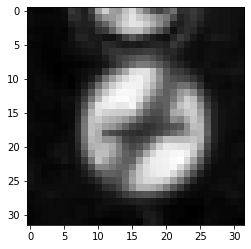

In [43]:
# plt.imshow( color.rgb2gray( X_train[0] ), cmap=plt.get_cmap('gray') )